# CSV: The Big Checkout



## `new_org.csv`

We'll begin by loading up the contents of `new_org.csv` with Pandas. This is the least complicated of the CSVs we'll be working with.

In [18]:
from os import getcwd
from os.path import join
import pandas as pd
data = pd.read_csv(join(getcwd(), '../data', 'new_org.csv'))

Next, let's see: 

1. How many records we've got; and 
2. What the first few pieces of data look like

In [19]:
print(f'There are {len(data)} records in the data set.')

data.head()

There are 497523 records in the data set.


,UUID,Company,Homepage
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,http://www.wetpaint.com/
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,https://www.zoho.com/
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,http://www.digg.com
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,http://www.omidyar.com
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,http://www.facebook.com


## `companies.csv`

Next, let's load and explore `companies.csv`.

In [21]:
filename = 'companies.csv'

companies = pd.read_csv(join(getcwd(), '../data', filename), encoding = 'ISO-8859-1')
print(f'There are records for {len(companies)} companies in {filename}.')

companies.head()

There are records for 8664 companies in companies.csv.


,Company Name,Company Name URL,Category Groups,Headquarters Location,Description,Crunchbase Rank,Founded Date,Closed Date,Number of Funding Rounds,Last Funding Date,Last Funding Amount,Last Funding Type,Total Funding Amount,Status
0,Wokrr,https://www.crunchbase.com/organization/wokrr,NaN,"San Jose, California, United States","Wokrr is based in San Jose, California, United...",NaN,1/1/16,NaN,1,1/1/00,1111,Seed,1111,Closed
1,BUILT IMAGES,https://www.crunchbase.com/organization/hometica,"Media and Entertainment, Real Estate, Content ...","San Clemente, California, United States",BUILT IMAGES stretches the imagination with Ri...,NaN,1/1/12,NaN,1,2/14/04,250000,Seed,250000,Operating
2,Dick or Bro,https://www.crunchbase.com/organization/dick-o...,"Media and Entertainment, Internet Services","Los Angeles, California, United States",celebrity voting,"54,374",1/1/12,NaN,1,1/1/11,150000,Seed,150000,Closed
3,StoryWorth,https://www.crunchbase.com/organization/storyw...,Internet Services,"San Francisco, California, United States",StoryWorth makes it easy for people to private...,"41,889",11/1/12,NaN,1,3/1/11,167000,Seed,167000,Operating
4,Ethonova,https://www.crunchbase.com/organization/ethonova,NaN,"San Francisco, California, United States",Ethonova Inc is a corporation located in San F...,"57,167",1/1/12,NaN,1,7/20/11,40000,Seed,40000,Operating


In [16]:
# All DataFrames have a dropna method, which drops 'any' row containing NaN.
df = companies.dropna(how='any')

# Display updated DataFrame
df.head()

,Company Name,Company Name URL,Category Groups,Headquarters Location,Description,Crunchbase Rank,Founded Date,Closed Date,Number of Funding Rounds,Last Funding Date,Last Funding Amount,Last Funding Type,Total Funding Amount,Status
41,Friendsignia,https://www.crunchbase.com/organization/friend...,"Media and Entertainment, Information Technolog...","Memphis, Tennessee, United States",Friendsignia is a relationship management tool...,"64,048",1/29/12,6/1/13,1,1/29/12,15000,Seed,15000,Closed
48,SupplySeeker.com,https://www.crunchbase.com/organization/supply...,"Commerce and Shopping, Sales and Marketing","New York, New York, United States",SupplySeeker.com is an online platform that of...,"60,908",2/1/12,11/1/13,1,2/1/12,100000,Seed,100000,Closed
64,Gaston Labs,https://www.crunchbase.com/organization/gaston...,"Media and Entertainment, Content and Publishing","Palo Alto, California, United States",Gaston Labs is a video and photo sharing service.,"51,410",1/1/12,2/1/13,1,3/1/12,100000,Seed,100000,Closed
66,Picklify,https://www.crunchbase.com/organization/picklify,"Commerce and Shopping, Media and Entertainment...","Philadelphia, Pennsylvania, United States",Picklify personalizes the shopping experience ...,"62,987",3/1/12,7/1/13,1,3/1/12,13000,Seed,13000,Closed
80,Osurv,https://www.crunchbase.com/organization/osurv,"Data and Analytics, Design, Mobile","Los Angeles, California, United States",Osurv is a mobile survey platform that predict...,"42,336",1/3/12,5/5/17,1,3/21/12,20000,Seed,20000,Was Acquired


Take a look at the IDs in the far left. Clearly, `dropna` has thrown away some good data.

### Digging Into `companies.csv`

We should start by calculating summary statistics around the columns **Number of Funding Rounds**, **Last Funding Amount**, **Last Funding Type**, **Total Funding Amount**, and **Status**, and maybe plotting a few Histograms to get a feel for things.

In [40]:
# Describe quickly produces good output for numerical data
companies.describe()

,Number of Funding Rounds,Last Funding Amount,Total Funding Amount
count,8664.000000,8.664000e+03,8.664000e+03
mean,1.812327,5.297919e+06,8.082858e+06
std,1.173451,1.911279e+07,3.216522e+07
min,1.000000,1.000000e+03,1.000000e+03
25%,1.000000,1.500000e+05,2.000000e+05
50%,1.000000,1.000000e+06,1.225000e+06
75%,2.000000,4.000000e+06,5.000000e+06
max,12.000000,9.000000e+08,1.704000e+09


In [64]:
# Let's take a look at the most common locations
from collections import Counter

counter = Counter(companies['Headquarters Location'])
print(f'The {len(companies)} companies in the data set are distributed amongst {len(counter)} unique locations.')
print('The most common of these locations are:')

for location in counter.most_common(10):
    (city_state, count) = location
    print(f'- {count} startups are located in {city_state}.')

The 8664 companies in the data set are distributed amongst 914 unique locations.
The most common of these locations are:
- 1475 startups are located in San Francisco, California, United States.
- 1079 startups are located in New York, New York, United States.
- 279 startups are located in Los Angeles, California, United States.
- 249 startups are located in Palo Alto, California, United States.
- 204 startups are located in Boston, Massachusetts, United States.
- 192 startups are located in Chicago, Illinois, United States.
- 183 startups are located in Austin, Texas, United States.
- 182 startups are located in Seattle, Washington, United States.
- 149 startups are located in Mountain View, California, United States.
- 133 startups are located in San Diego, California, United States.


In [75]:
# Let's count statuses, as well
counter = Counter(companies['Status'])

print(f'There are {len(counter)} possible statuses for a start up: {counter.keys()}.')

for count in counter.items():
    status, count = count
    print(f'There are {count} start ups with status \'{status}\' in your data set.')

There are 4 possible statuses for a start up: dict_keys(['Closed', 'Operating', 'Was Acquired', 'IPO']).
There are 253 start ups with status 'Closed' in your data set.
There are 7922 start ups with status 'Operating' in your data set.
There are 466 start ups with status 'Was Acquired' in your data set.
There are 23 start ups with status 'IPO' in your data set.


Already, it's worth asking: Does this jive with what we expect? 

I'd say **yes**. These numbers seem to mesh with intuition: A huge density of start ups on the West Coast, with the major exceptions in NYC, Chicago, and Austin is bang-on. Obviously, this has just been a very cursory look, but the data seems credulous.

Some obvious geographical questions arise immediately: Does location predict Total or Last Funding Amount?

Alternatively, we could search for patterns in Funding amounts and **Category Groups**, which might yield insight into consumer interests at the national level. 

A more detailed analysis of the Date columns might reveal trends in _investor_ behavior. I'm curious: During what months are start-ups most likely to receive funding? Put differently: During what months are investors most likely to bite? What about spending habits—do the seasons seem to correlate with funding amounts? [Moods do](https://en.wikipedia.org/wiki/Seasonal_affective_disorder)—investment behavior might, too.

We can come back to this later. For now, I feel comfortable with the data in this file, and I have some ideas as to what we can do with it. On to the next one.

## Exploring `funding_rounds.csv`

As before, let's import and explore `funding_rounds.csv`.

In [80]:
funding_rounds = pd.read_csv(join(getcwd(), '../../', 'funding_rounds.csv'), encoding='ISO-8859-1')

print(f'There are {len(funding_rounds)} records in funding_rounds.csv.')

funding_rounds.head()

There are 10901 records in funding_rounds.csv.


,Company Name,Company Name URL,Funding Type,Money Raised,Announced On Date
0,TestMetal,https://www.crunchbase.com/organization/testmetal,Series A,690000,7/10/15
1,WinApp Inc,https://www.crunchbase.com/organization/winapp...,Seed,2000000,10/30/15
2,Cambly,https://www.crunchbase.com/organization/cambly,Seed,7000000,9/1/16
3,Goboxi,https://www.crunchbase.com/organization/goboxi,Seed,3000000,12/6/13
4,KaChing!,https://www.crunchbase.com/organization/kachin...,Seed,30000000,2/24/17


This is promising from the start. Obviously, we'll start with basic descriptive stats.

In [81]:
funding_rounds.describe()

,Money Raised
count,1.090100e+04
mean,7.172944e+06
std,2.398095e+07
min,1.000000e+03
25%,2.908700e+05
50%,2.000000e+06
75%,6.300000e+06
max,9.460000e+08


Not _super_ helpful. 

Let's examine the **Money Raised** column.

In [84]:
mean_funding = funding_rounds['Money Raised'].mean()
print(f'On average, startups raise ${mean_funding}.')

On average, startups raise $7172944.072929089.


Interesting, but not quite exciting enough to qualify as an article headline. Let's take a look at trends in the Series type.

In [90]:
series_counter = Counter(funding_rounds['Funding Type'])
series_counter.most_common()

[('Seed', 6565),
 ('Series A', 2969),
 ('Series B', 1045),
 ('Series C', 263),
 ('Series D', 59)]

On the bright side, this matches intution. But, it still doesn't help marketing.

What about the proportion of money awarded in Seed vs Other rounds?

In [103]:
seed_rounds = funding_rounds.loc[funding_rounds['Funding Type'] == 'Seed']
seed_total = seed_rounds['Money Raised'].sum()
gross_total = funding_rounds['Money Raised'].sum()
proportion_of_total = seed_total / gross_total * 100

print(f'Seed funding accounted for {proportion_of_total}% of all awards in the data set.')

Seed funding accounted for 11.59020171945812% of all awards in the data set.


In [ ]:
Hm. Feels a tad low. Let's inspect a little more.

In [118]:
funding_types = ['Seed', 'Series A', 'Series B', 'Series C', 'Series D']

totals = {}
for funding_type in funding_types:
    type_frame = funding_rounds.loc[funding_rounds['Funding Type'] == funding_type]
    totals[funding_type] = type_frame['Money Raised'].sum()
             
MILLION = 100000
for type, sum in totals.items():
    sum /= MILLION
    percent_total = sum / (gross_total / MILLION) * 100
    print(f'Funding for {type} Rounds accounted for ${sum} million, or {percent_total}% of all money awarded.')

Funding for Seed Rounds accounted for $90626.4105 million, or 11.59020171945812% of all money awarded.
Funding for Series A Rounds accounted for $286560.61632 million, or 36.64820585607374% of all money awarded.
Funding for Series B Rounds accounted for $236135.10849 million, or 30.199293178948405% of all money awarded.
Funding for Series C Rounds accounted for $116482.99808 million, or 14.89699787496773% of all money awarded.
Funding for Series D Rounds accounted for $52117.5 million, or 6.6653013705520054% of all money awarded.


There's an interesting pattern: The majority of investment dollars are doled out between **Series A and B** rounds. Sensible enough.

Also interesting is the fact that the distribution looks _maaaybe_ [Poissonian](https://en.wikipedia.org/wiki/Poisson_distribution).

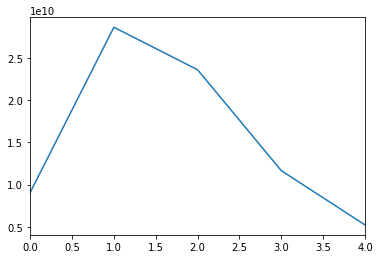

In [146]:
%matplotlib inline
pd.Series(list(totals.values())).plot(kind='line')